In [2]:
from IPython.display import Image 
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display

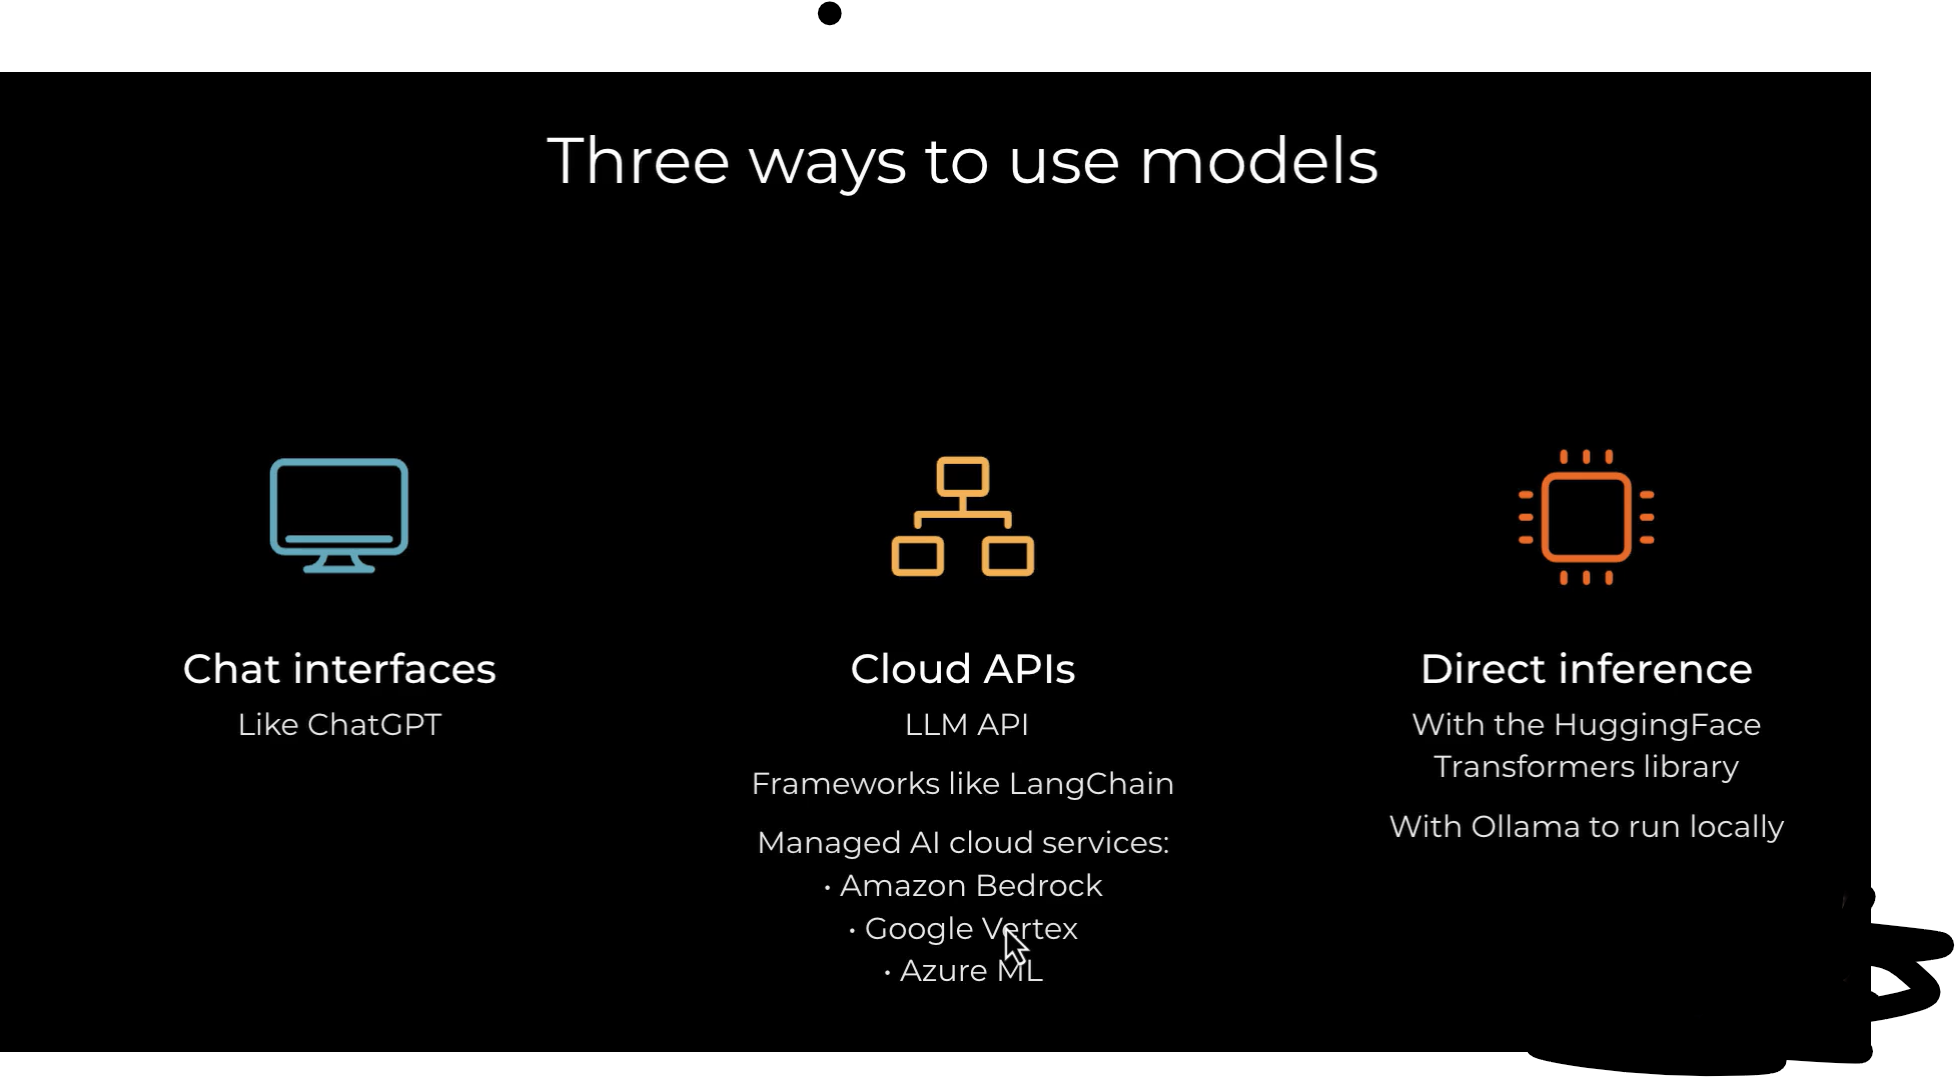

In [3]:
Image("3_WAYS_TO_USE_LLM.png")

### TO CEHCK IF OLLAMA IS RUNNING JUST CHECK THIS URL: http://localhost:11434/

In [4]:
OLLAMA_API = "http://localhost:11434/api/chat"
HEADERS = {"Content-Type": "application/json"}
MODEL = "llama3.2"

In [5]:
messages = [
    {"role": "user", "content": "Describe some of the business applications of Generative AI"}
]

In [14]:
payload = {
        "model": MODEL,
        "messages": messages,
        "stream": False
    }

In [15]:
!ollama pull llama3.2

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest 
pulling dde5aa3fc5ff... 100% ▕████████████████▏ 2.0 GB                         
pulling 966de95ca8a6... 100% ▕████████████████▏ 1.4 KB                         
pulling fcc5a6bec9da... 100% ▕████████████████▏ 7.7 KB                         
pulling a70ff7e570d9... 100% ▕████████████████▏ 6.0 KB                         
pulling 56bb8bd477a5... 100% ▕████████████████▏   96 B                         
pulling 34bb5ab01051... 100% ▕████████████████▏  561 B                         
verifying sha256 digest 
writing manifest 
success pulling manifest 
pulling dde5aa3fc5ff... 100% ▕████████████████▏ 2.0 GB                         
pulling 966de95ca8a6... 100% ▕████████████████▏ 1.4 KB                         
pulling fcc5a6bec9da... 100% ▕████████████████▏ 7.7 KB                         
pulling a70ff7e570d9... 100% ▕████████████████▏ 6.0 KB                         
pulling 56bb8bd477a5... 100% ▕███████

In [16]:
response = requests.post(OLLAMA_API, json=payload, headers=HEADERS)
print(response.json()['message']['content'])

Generative AI (Generative Artificial Intelligence) has numerous business applications across various industries. Here are some examples:

1. **Content Creation**: Generative AI can be used to generate high-quality content such as:
 * Blog posts and articles
 * Social media posts and tweets
 * Product descriptions and product reviews
 * Music and videos
2. **Marketing Automation**: Generative AI can help automate marketing tasks such as:
 * Generating personalized email campaigns
 * Creating targeted social media ads
 * Developing chatbots for customer service
3. **Product Design**: Generative AI can be used to design new products, such as:
 * Product prototypes
 * Fashion designs
 * Architectural designs
4. **Image and Video Generation**: Generative AI can generate high-quality images and videos, such as:
 * Product visuals (e.g., 3D models)
 * Social media graphics
 * Advertising visuals
5. **Customer Service**: Generative AI can be used to power chatbots that provide customer support

In [6]:
import os
import requests
import json
from typing import List
from dotenv import load_dotenv
from bs4 import BeautifulSoup
from IPython.display import Markdown, display, update_display
from openai import OpenAI

In [7]:
load_dotenv(override=True)
api_key = os.getenv('OPENAI_API_KEY')

if api_key and api_key.startswith('sk-proj-') and len(api_key)>10:
    print("API key looks good so far")
else:
    print("There might be a problem with your API key? Please visit the troubleshooting notebook!")
    


API key looks good so far


In [8]:
MODEL = 'gpt-4o-mini'
openai = OpenAI()

In [9]:
headers = {
 "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}

class Website:


    def __init__(self, url):
        self.url = url
        response = requests.get(url, headers=headers)
        self.body = response.content
        soup = BeautifulSoup(self.body, 'html.parser')
        self.title = soup.title.string if soup.title else "No title found"
        if soup.body:
            for irrelevant in soup.body(["script", "style", "img", "input"]):
                irrelevant.decompose()
            self.text = soup.body.get_text(separator="\n", strip=True)
        else:
            self.text = ""
        links = [link.get('href') for link in soup.find_all('a')]
        self.links = [link for link in links if link]

    def get_contents(self):
        return f"Webpage Title:\n{self.title}\nWebpage Contents:\n{self.text}\n\n"

In [10]:
tariff = Website("https://gsphub.eu/Access2Markets")
print(tariff.title)
print(tariff.text)


Access2Market | gsphub
Skip to main content
menu
About the EU GSP
Conventions
Country Info
News
Convention Compliance Database
Library
Access2Markets
Exporting from the EU, importing into the EU - all you need to know
Access2Markets
allows businesses and individuals to obtain useful information about trading with third countries, such as on
tariffs, taxes, procedures, formalities and requirements, rules of origin, export measures, statistics, trade barriers
and much more. The platform also allows to access key information needed for trade in services as well as for investment and procurement in 3rd countries. Lastly, it is also possible to learn about EU trade agreements, how to benefit from them and read stories on successful companies using them. Access2Markets is here to help you and your business for
import and export
.
Watch this explanatory video on how the Access2Markets portal can help exporters find all the key information they need to know about:
Single Entry Point
The Single

In [11]:
print(tariff.links)

['#main-content', '/', '/about-gsp', '/conventions', '/country-info', '/news', '/monitoring-database', '/library', 'https://trade.ec.europa.eu/access-to-markets/en/content/', 'https://trade.ec.europa.eu/access-to-markets/en/home', 'https://trade.ec.europa.eu/access-to-markets/en/content/single-entry-point-0', 'https://trade.ec.europa.eu/access-to-markets/en/content/events-access2markets', '/cookies', '/privacy', '/contact-us', '/terms-conditions', 'https://gsphub.eu/about-gsp/#block-abouttheeugspaboutthegsphub']


In [12]:
link_system_prompt = "You are provided with a list of links found on a webpage. \
You are able to decide which of the links would be most relevant to include in a brochure about the company, \
such as links to an About page, or a Company page, or Careers/Jobs pages.\n"
link_system_prompt += "You should respond in List format as in this example:"
link_system_prompt += """
{
    "links": ["About Page","https://full.url/goes/here/about"] ,["Career Page" , "https://another.full.url/careers"]
}
"""

In [13]:
print(link_system_prompt)

You are provided with a list of links found on a webpage. You are able to decide which of the links would be most relevant to include in a brochure about the company, such as links to an About page, or a Company page, or Careers/Jobs pages.
You should respond in List format as in this example:
{
    "links": ["About Page","https://full.url/goes/here/about"] ,["Career Page" , "https://another.full.url/careers"]
}



In [14]:
def get_links_user_prompt(website):
    user_prompt = f"Here is the list of links on the website of {website.url} - "
    user_prompt += "please decide which of these are relevant web links for a brochure about the company, respond with the full https URL in JSON format. \
Do not include Terms of Service, Privacy, email links.\n"
    user_prompt += "Links (some might be relative links):\n"
    user_prompt += "\n".join(website.links)
    return user_prompt

In [15]:
print(get_links_user_prompt(tariff))

Here is the list of links on the website of https://gsphub.eu/Access2Markets - please decide which of these are relevant web links for a brochure about the company, respond with the full https URL in JSON format. Do not include Terms of Service, Privacy, email links.
Links (some might be relative links):
#main-content
/
/about-gsp
/conventions
/country-info
/news
/monitoring-database
/library
https://trade.ec.europa.eu/access-to-markets/en/content/
https://trade.ec.europa.eu/access-to-markets/en/home
https://trade.ec.europa.eu/access-to-markets/en/content/single-entry-point-0
https://trade.ec.europa.eu/access-to-markets/en/content/events-access2markets
/cookies
/privacy
/contact-us
/terms-conditions
https://gsphub.eu/about-gsp/#block-abouttheeugspaboutthegsphub


In [16]:
def get_links(url):
    website = Website(url)
    response = openai.chat.completions.create(
        model=MODEL,
        messages=[
            {"role": "system", "content": link_system_prompt},
            {"role": "user", "content": get_links_user_prompt(website)}
      ],
        response_format={"type": "json_object"}
    )
    result = response.choices[0].message.content
    return json.loads(result)

In [17]:
tariff_links = get_links("https://gsphub.eu/Access2Markets")
tariff_links

{'links': [['About Page',
   'https://gsphub.eu/about-gsp/#block-abouttheeugspaboutthegsphub'],
  ['Home Page', 'https://trade.ec.europa.eu/access-to-markets/en/home'],
  ['Country Info', 'https://gsphub.eu/country-info'],
  ['News', 'https://gsphub.eu/news'],
  ['Monitoring Database', 'https://gsphub.eu/monitoring-database'],
  ['Library', 'https://gsphub.eu/library'],
  ['Events',
   'https://trade.ec.europa.eu/access-to-markets/en/content/events-access2markets']]}

## Making Brocheture

In [21]:
link_system_prompt = "You are provided with a list of links found on a webpage. \
You are able to decide which of the links would be most relevant to include in a brochure about the company, \
such as links to an About page, or a Company page, or Careers/Jobs pages.\n"
link_system_prompt += "You should respond in JSON as in this example:"
link_system_prompt += """
{
    "links": [
        {"type": "about page", "url": "https://full.url/goes/here/about"},
        {"type": "careers page": "url": "https://another.full.url/careers"}
    ]
}
"""

In [22]:
def get_links_user_prompt(website):
    user_prompt = f"Here is the list of links on the website of {website.url} - "
    user_prompt += "please decide which of these are relevant web links for a brochure about the company, respond with the full https URL in JSON format. \
Do not include Terms of Service, Privacy, email links.\n"
    user_prompt += "Links (some might be relative links):\n"
    user_prompt += "\n".join(website.links)
    return user_prompt

In [18]:
def get_all_details(url) :
    result = "Landing Page:\n"
    result+= Website(url).get_contents()
    links = get_links(url)
    print(f"Found Lnks are as follow: {links}\n")`
    for link in links["links"]:
        result += f"\n\n{link['type']}\n"
        result += Website(link["url"]).get_contents()
    return result

In [23]:
print(get_all_details("https://gsphub.eu/Access2Markets"))

Found Lnks are as follow: {'links': [{'type': 'about page', 'url': 'https://gsphub.eu/about-gsp/#block-abouttheeugspaboutthegsphub'}, {'type': 'home page', 'url': 'https://trade.ec.europa.eu/access-to-markets/en/home'}, {'type': 'contact page', 'url': 'https://gsphub.eu/contact-us'}]}

Landing Page:
Webpage Title:
Access2Market | gsphub
Webpage Contents:
Skip to main content
menu
About the EU GSP
Conventions
Country Info
News
Convention Compliance Database
Library
Access2Markets
Exporting from the EU, importing into the EU - all you need to know
Access2Markets
allows businesses and individuals to obtain useful information about trading with third countries, such as on
tariffs, taxes, procedures, formalities and requirements, rules of origin, export measures, statistics, trade barriers
and much more. The platform also allows to access key information needed for trade in services as well as for investment and procurement in 3rd countries. Lastly, it is also possible to learn about EU tra

## FINAL RESULT AND MAKING OF BROCHEURE

In [24]:
def get_all_details(url):
    result = "Landing page:\n"
    result += Website(url).get_contents()
    links = get_links(url)
    print("Found links:", links)
    for link in links["links"]:
        result += f"\n\n{link['type']}\n"
        result += Website(link["url"]).get_contents()
    return result

In [25]:
system_prompt = "You are an assistant that analyzes the contents of several relevant pages from a company website \
and creates a short humorous, entertaining, jokey brochure about the company for prospective customers, investors and recruits. Respond in markdown.\
Include details of company culture, customers and careers/jobs if you have the information."

In [28]:
def get_brochure_user_prompt(company_name, url):
    user_prompt = f"You are looking at a company called: {company_name}\n"
    user_prompt += f"Here are the contents of its landing page and other relevant pages; use this information to build a short brochure of the company in markdown.\n"
    user_prompt += get_all_details(url)
    user_prompt = user_prompt[:25_000] # Truncate if more than 5,000 characters
    return user_prompt

In [29]:
get_brochure_user_prompt("EU TARIFF" , "https://gsphub.eu/Access2Markets")

Found links: {'links': [{'type': 'about page', 'url': 'https://gsphub.eu/about-gsp/#block-abouttheeugspaboutthegsphub'}, {'type': 'contact page', 'url': 'https://gsphub.eu/contact-us'}]}


'You are looking at a company called: EU TARIFF\nHere are the contents of its landing page and other relevant pages; use this information to build a short brochure of the company in markdown.\nLanding page:\nWebpage Title:\nAccess2Market | gsphub\nWebpage Contents:\nSkip to main content\nmenu\nAbout the EU GSP\nConventions\nCountry Info\nNews\nConvention Compliance Database\nLibrary\nAccess2Markets\nExporting from the EU, importing into the EU - all you need to know\nAccess2Markets\nallows businesses and individuals to obtain useful information about trading with third countries, such as on\ntariffs, taxes, procedures, formalities and requirements, rules of origin, export measures, statistics, trade barriers\nand much more. The platform also allows to access key information needed for trade in services as well as for investment and procurement in 3rd countries. Lastly, it is also possible to learn about EU trade agreements, how to benefit from them and read stories on successful compan

In [30]:
def create_brochure(company_name, url):
    response = openai.chat.completions.create(
        model=MODEL,
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": get_brochure_user_prompt(company_name, url)}
          ],
    )
    result = response.choices[0].message.content
    display(Markdown(result))

In [32]:
broch = create_brochure("EU TARIFF" , "https://gsphub.eu/Access2Markets")

Found links: {'links': [{'type': 'about page', 'url': 'https://gsphub.eu/about-gsp/#block-abouttheeugspaboutthegsphub'}, {'type': 'contact page', 'url': 'https://gsphub.eu/contact-us'}, {'type': 'news page', 'url': 'https://trade.ec.europa.eu/access-to-markets/en/news'}]}


```markdown
# EU TARIFF: Making Trade Less Tricky and More Tasty!

## Welcome to the World of EU TARIFF
Where importing and exporting is as easy as pie (a very well-documented pie)! EU TARIFF, through its Access2Markets platform, helps you navigate the complex labyrinth of tariffs, taxes, and trading regulations—sort of like a GPS for global trading, minus the annoying voice that says, "Recalculating!"

### Important Information for You!
- **Trading Made Easy**: Looking to import or export goods? We’re like a Swiss Army knife—providing all the information you need under one roof: tariffs, formalities, export measures, and even success stories from companies who got it right!
- **Cheaper by the Dozen**: With our Generalised Scheme of Preferences (GSP), your duties might get slashed, making imports from developing nations as cheap as a packet of crisps! 🥳 

## Meet Our Culture: The Tariffic Team!
At EU TARIFF, we believe in good vibes only—our team is dedicated, diverse, and each member is jolly good with numbers. Rumor has it, we have an annual 'Tariff Trivia Contest' to make sense of all the numbers and policies. Just don’t ask Jim about the tax code. He tends to spiral into an existential crisis!

### Work-Life Balance: Yes, Please!
Ever seen a trade profession where you can escape the office for a beach meeting? Well, we *try* to do that! Plus, our regular training sessions feel more like a party than work. We even serve coffee that’s more energizing than a triple shot espresso!

## Customers: The Saviors of Trade
From small start-ups trying to break free from their warehouse walls to grand enterprises looking to spice up their importing game, our diverse clientele covers a broad spectrum. We’re here for everyone who dreams of trading with countries far and wide, all while ensuring they respect vital human rights and sustainable development. 🌍

## Join the Revolution: Careers at EU TARIFF
- **Current Positions**: We are on the lookout for enthusiastic trade wizards who can conjure better trade paths while maintaining a sense of humor. You could be in charge of our 'Tariff Talk' chatbot. Just remember, it's always polite to say "Please" and "Thank you!" even to robots.
- **Work Hard, Play Hard**: Office lunches, trivia nights, and the occasional cake day—because no one can be serious around multi-lingual documents without a treat or two!

### Final Words of Wisdom
So, if you're tired of navigating the murky waters of trade regulations alone, let EU TARIFF be your surfboard. We promise to make your importing and exporting dreams come true—well, at least make them less of a nightmare!

For more information or to get in touch, check us out at [Access2Markets](#) and join our trading adventure today!
```


In [33]:
print(broch)

None


Found links: {'links': [{'type': 'about page', 'url': 'https://gsphub.eu/about-gsp/#block-abouttheeugspaboutthegsphub'}, {'type': 'contact page', 'url': 'https://gsphub.eu/contact-us'}, {'type': 'news page', 'url': 'https://trade.ec.europa.eu/access-to-markets/en/news'}]}
# EU TARIFF: Making Trade Less Tricky and More Tasty!

## Welcome to the World of EU TARIFF
Where importing and exporting is as easy as pie (a very well-documented pie)! EU TARIFF, through its Access2Markets platform, helps you navigate the complex labyrinth of tariffs, taxes, and trading regulations—sort of like a GPS for global trading, minus the annoying voice that says, "Recalculating!"

### Important Information for You!
- **Trading Made Easy**: Looking to import or export goods? We’re like a Swiss Army knife—providing all the information you need under one roof: tariffs, formalities, export measures, and even success stories from companies who got it right!
- **Cheaper by the Dozen**: With our Generalised Scheme of Preferences (GSP), your duties might get slashed, making imports from developing nations as cheap as a packet of crisps! 🥳 

## Meet Our Culture: The Tariffic Team!
At EU TARIFF, we believe in good vibes only—our team is dedicated, diverse, and each member is jolly good with numbers. Rumor has it, we have an annual 'Tariff Trivia Contest' to make sense of all the numbers and policies. Just don’t ask Jim about the tax code. He tends to spiral into an existential crisis!

### Work-Life Balance: Yes, Please!
Ever seen a trade profession where you can escape the office for a beach meeting? Well, we *try* to do that! Plus, our regular training sessions feel more like a party than work. We even serve coffee that’s more energizing than a triple shot espresso!

## Customers: The Saviors of Trade
From small start-ups trying to break free from their warehouse walls to grand enterprises looking to spice up their importing game, our diverse clientele covers a broad spectrum. We’re here for everyone who dreams of trading with countries far and wide, all while ensuring they respect vital human rights and sustainable development. 🌍

## Join the Revolution: Careers at EU TARIFF
- **Current Positions**: We are on the lookout for enthusiastic trade wizards who can conjure better trade paths while maintaining a sense of humor. You could be in charge of our 'Tariff Talk' chatbot. Just remember, it's always polite to say "Please" and "Thank you!" even to robots.
- **Work Hard, Play Hard**: Office lunches, trivia nights, and the occasional cake day—because no one can be serious around multi-lingual documents without a treat or two!

### Final Words of Wisdom
So, if you're tired of navigating the murky waters of trade regulations alone, let EU TARIFF be your surfboard. We promise to make your importing and exporting dreams come true—well, at least make them less of a nightmare!

For more information or to get in touch, check us out at [Access2Markets](#) and join our trading adventure today!

### We can make it more User Friendly by adding streaming that gives visualization of type writng 

In [35]:
def stream_brochure(company_name, url):
    stream = openai.chat.completions.create(
        model=MODEL,
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": get_brochure_user_prompt(company_name, url)}
          ],
        stream=True
    )
    
    response = ""
    display_handle = display(Markdown(""), display_id=True)
    for chunk in stream:
        response += chunk.choices[0].delta.content or ''
        response = response.replace("```","").replace("markdown", "")
        update_display(Markdown(response), display_id=display_handle.display_id)

In [70]:
text = stream_brochure("EU TARIFF" ,  "https://gsphub.eu/Access2Markets")

Found links: {'links': [{'type': 'about page', 'url': 'https://gsphub.eu/about-gsp/#block-abouttheeugspaboutthegsphub'}, {'type': 'contact page', 'url': 'https://gsphub.eu/contact-us'}, {'type': 'news page', 'url': 'https://trade.ec.europa.eu/access-to-markets/en/home'}]}


# Welcome to EU TARIFF - Your One-Stop Trade Shop! 🚢🌍

## Who Are We? 

At EU TARIFF, we help businesses and individuals navigate the complex waters of importing and exporting! Whether you're a small business owner in need of a trade expert or a world traveler with a taste for fine goods, you’re in the right place. Imagine us as your friendly neighborhood trade superheroes, swooping in to save the day with all the details about tariffs, taxes, and trade agreements faster than you can say "import-export!"

## Our Mission: *Trading Happiness*

We're not just about numbers and regulations, folks! Our mission is to sprinkle a bit of joy on every trade, contributing to poverty reduction, promoting sustainable development, and ensuring everyone plays by the rules. Our motto? *"Good goods make for happier dudes!"*

### What We Offer:
- **Access2Markets**: Your magical portal to everything you need about trading with third countries - be it tariffs, taxes, or the exact procedure to bring bananas from the tropics to your breakfast table!
- **The Single Entry Point**: Facing market access issues? Think of us as your trade therapist. We're here to help and listen (figuratively speaking, of course).
- **GSP Hub**: A hub that isn't as confusing as it sounds. We provide duty reductions and help you get your goods to the EU faster, while also keeping an eye on sustainability!

## Who Are Our Customers?

We serve a medley of customers, from export ninjas and import aficionados to budding entrepreneurs and established businesses. If you're bringing something marvelous to the EU, we want to help! Our beneficiaries stretch worldwide, from Mongolia to the Philippines, and you might just find your new best friend in our trade community.

## Cultivating Our Culture: *Work Hard, Trade Harder!*

Join our squad, and you’ll find a vibrant culture where coffee breaks are filled with trade puns, and the water cooler talks revolve around tariffs and trade agreements (we're cool like that). Collaboration is our superpower, and every voice counts – even if it’s just a whisper about the latest statistics on avocado imports. 

### Careers: Become a Trade Champion!🌟

Want to work where the action is? We're on the lookout for passionate individuals ready to dive into the world of trade and have a laugh or two along the way. If you believe that work can be a fun adventure, consider joining the EU TARIFF's crew. 

- **Current Openings**: From that meticulous data analyst to a charismatic outreach exec - we've got a spot for you!
- **Perks**: Flexible hours, an international workspace (no passport needed!), and regular “Trade Talk” Thursdays where we decode trade jargon over snacks.

## Contact Us 📨

Have questions? Need more laughs? You can reach us at [TRADE-GSP@ec.europa.eu](mailto:TRADE-GSP@ec.europa.eu) – we respond faster than you can say “trade barrier!”

## Join Us!

Are you ready to open your trade horizons and share in the joys of importing and exporting? Let’s make trade fun, sustainable, and as straightforward as your favorite DIY kit! 

Remember, at EU TARIFF, we’re more than just a trade resource; we’re your goofy partners in the world of trade! Which one of us knows the most about tariffs? We just might have a duel over lunch—care to join? 😉 

---
*Disclaimer: No actual duels will take place.*

In [73]:
print(text)

None


In [43]:
tarriff= '''
Welcome to EU TARIFF: The Tariff Service of Your Dreams (Or At Least Your Import/Export Needs)
Where Bureaucracy Meets Fun!
(Just kidding, we can't promise that!)

About Us
Welcome to EU TARIFF—the international trade wing of the EU with a side of GSP (that’s the Generalised Scheme of Preferences for the acronym-challenged among us). Our mission? To make importing and exporting like riding a bicycle with training wheels—except these wheels are defined by tariff lines!

Since 1971, we’ve been climbing the trade-a-ladder, ensuring that developing countries can pedal their way into the EU market with lower tariffs and delightful, duty-free goods. We've evolved into the go-to place for businesses—big and small (mostly small and medium-sized)—to figure out who they need to bribe (just kidding, they're all above board!) to make their trading dreams come true.

Our Culture
At EU TARIFF, we believe in sustainable development (we hug trees, but only after checking they aren’t export products). Our team is diverse and filled with trade enthusiasts, data geeks, and the occasional coffee-fueled engineer who transforms chicken scratch into numbers that make sense! We work hard but also have fun, usually during lunchtime when trading puns are the hottest commodities!

Core Values:

Sustainability: We’re all about helping everyone play nice in the trade sandbox.
Teamwork: Our virtual meetings often feel like chaotic Zoom calls, complete with cats and bad internet connections.
Inclusion: We welcome trade enthusiasts from around the globe, as long as they believe in human rights (no exceptions)!
Our Customers
Whether you’re a small farmer from the Congo trying to sell your wares or a big corporation looking to expand your reach into the EU, we’ve got your back! With tools like the Access2Markets platform, you can get all the juicy tidbits on tariffs, export measures, and trade barriers without having to sift through a mountain of paperwork.

Who We Help:

Exporters: Ever wanted to ship your homemade jam to Germany? Let’s talk tariffs!
Importers: Looking to scoop up the latest products from abroad? We’ll help you avoid the landmines!
Civilians: Just curious? We’re here for your burning trading questions.
Careers at EU TARIFF
Are you looking to trade your day job for a fulfilling career in international trade? Join us at EU TARIFF and be part of something exceptional!

Open Positions:

Tariff Analyst: If you can decipher croissant-shaped graphs, we want you!
Compliance Officer: Know your human rights from your tariff lines? You belong here!
Data Guru: Love spreadsheets more than real people? Welcome aboard!
Why Work With Us?
Flexible hours: We understand that importing/exporting never sleeps, and neither do you!
Training sessions: Bring your questions—we'll serve up knowledge (sometimes with snacks!).
Vibrant Office Culture: Rumor has it, we have mandatory pet photos for new hires!
Contact Us
Questions about the GSP?
Want to know if we can help? Or perhaps you just want to share a good trade pun?
Contact us at TRADE-GSP@ec.europa.eu

Looking forward to helping you make your trading experience as smooth as a perfectly executed tariff reduction!

EU TARIFF: Where Trade Meets Fun (in a not-so-fun bureaucratic way)!'''

## lets's Convert this to Hindi and German

In [59]:
translator_system_prompt = "You are an Assistant who is responsible to convert provided borchure into Hindi and German \
and you keep it in such that it doesn't loose its value while converting.Respond in markdown. "

In [60]:
def get_translation_user_prompt(brochure):
    user_prompt = f"You are looking at a company's Brochure\n"
    user_prompt += f"Here are the detailed brochure and you are needed to translate it and present it like a borchure itself in Hindi and German.\n"
    user_prompt += f"It should be such that everyone gets intrested in the brochure and do not add or miss any information provided to you in the English brochure.\n"
    user_prompt += f"Below is the brochure with its title in the first line as EU Tariff.\n"
    user_prompt += brochure
   
    return user_prompt

In [65]:
def translated_brochure():
    stream = openai.chat.completions.create(
        model=MODEL,
        messages=[
            {"role": "system", "content": translator_system_prompt},
            {"role": "user", "content": get_translation_user_prompt(tarriff)}
          ],
        stream=True
    )
    
    response = ""
    display_handle = display(Markdown(""), display_id=True)
    for chunk in stream:
        response += chunk.choices[0].delta.content or ''
        response = response.replace("```","").replace("markdown", "")
        update_display(Markdown(response), display_id=display_handle.display_id)

In [67]:
translated_brochure()


# EU टैरिफ

## EU टैरिफ में आपका स्वागत है: आपके सपनों की टैरिफ सेवा (या कम से कम आपके आयात/निर्यात की आवश्यकताओं के लिए)
### जहाँ नौकरशाही मिलता है मज़े से!
(बस मजाक कर रहे हैं, हम यह वादा नहीं कर सकते!)

---

### हमारे बारे में
EU टैरिफ में आपका स्वागत है—EU का अंतरराष्ट्रीय व्यापार विंग, जिसमें GSP (यह सामान्यीकृत निर्यात योजना है, यदि आप संक्षिप्ताक्षर-चुनौतीपूर्ण हैं) का तड़का है। हमारा मिशन? आयात और निर्यात को उस तरह से आसान बनाना जैसे साइकिल चलाना जिसमें प्रशिक्षण पहिए हों—सिवाय इसके कि ये पहिए टैरिफ लाइनों द्वारा परिभाषित होते हैं!

1971 से, हम व्यापार की सीढ़ी चढ़ रहे हैं, यह सुनिश्चित करते हुए कि विकासशील देशों को कम टैरिफ और आकर्षक, ड्यूटी-फ्री सामान के साथ EU बाजार में प्रवेश करने के लिए साइकिल चलाने की अनुमति है। हमने व्यवसायों के लिए जाने-माने स्थान में विकसित किया है—बड़े और छोटे (अधिकतर छोटे और मध्यम आकार के)—यह पता लगाने के लिए कि उन्हें अपनी व्यापारिक सपनों को साकार करने के लिए किसे रिश्वत देना है (बस मजाक कर रहे हैं, वे सभी कानूनी हैं!)।

---

### हमारी संस्कृति
EU टैरिफ में, हम सतत विकास में विश्वास करते हैं (हम पेड़ों को गले लगाते हैं, लेकिन केवल यह सुनिश्चित करने के बाद कि वे निर्यात उत्पाद नहीं हैं)। हमारी टीम विविध और व्यापार उत्साही, डेटा प्रेमियों, और कभी-कभी कॉफी से भरे इंजीनियरों से भरी है जो चिकन स्क्रैच को नंबरों में बदल देती हैं जो समझ में आते हैं! हम कड़ी मेहनत करते हैं, लेकिन मज़ा भी करते हैं, आमतौर पर लंच के दौरान जब व्यापार संबंधी मजेदार बातों का बोलबाला रहता है!

---

### मूल्यों:
- **सततता:** हम सभी को व्यापारSandbox में अच्छे खेलने में मदद करने के लिए समर्पित हैं।
- **टीमवर्क:** हमारी आभासी बैठकें अक्सर बेतरतीब ज़ूम कॉल की तरह लगती हैं, बिल्ली और खराब इंटरनेट कनेक्शन के साथ।
- **समावेशिता:** हम दुनिया भर के व्यापार उत्साही लोगों का स्वागत करते हैं, जब तक कि वे मानव अधिकारों में विश्वास करते हैं (कोई अपवाद नहीं!)।

---

### हमारे ग्राहक
चाहे आप कांगो के एक छोटे किसान हों जो अपने सामान को बेचना चाहते हैं या एक बड़ी कंपनी जो EU में अपने पहुंच का विस्तार करना चाहती है, हम आपके साथ हैं! Access2Markets प्लेटफॉर्म जैसे उपकरणों के साथ, आप बिना पेपरवर्क के बौछार के टैरिफ, निर्यात उपायों और व्यापार बाधाओं के बारे में सभी जानकारी प्राप्त कर सकते हैं।

---

### हम किसकी मदद करते हैं:
- **निर्यातक:** क्या कभी अपने घरेलू जाम को जर्मनी भेजने का सोचा है? चलो टैरिफ के बारे में बात करते हैं!
- **आयातक:** विदेश से नवीनतम उत्पादों को हासिल करने के इच्छुक? हम आपको संवेदनाकारी से बचाने में मदद करेंगे!
- **सामान्य नागरिक:** बस जिज्ञासु? हम यहां आपके व्यापार की गर्म सवालों के लिए हैं।

---

### EU टैरिफ में कैरियर
क्या आप अपने दिन की नौकरी को एक संतोषजनक अंतरराष्ट्रीय व्यापार में बदलने की कोशिश कर रहे हैं? EU टैरिफ में जुड़ें और कुछ असाधारण का हिस्सा बनें!

### खुली पदानुक्रम:
- **टैरिफ विश्लेषक:** यदि आप क्रॉसेंट आकार के ग्राफ को समझ सकते हैं, तो हम आपको चाहते हैं!
- **अनुपालन अधिकारी:** क्या आप मानव अधिकारों को टैरिफ लाइनों से अलग कर सकते हैं? आप यहाँ belong करते हैं!
- **डेटा गुरु:** क्या आपको स्प्रेडशीट्स असली लोगों से ज्यादा पसंद हैं? स्वागत है!

---

### हमारे साथ काम क्यों करें?
- **लचीले घंटे:** हम समझते हैं कि आयात/निर्यात कभी नहीं सोता, और न ही आप!
- **प्रशिक्षण सत्र:** अपने सवाल लाएं—हम ज्ञान परोसेंगे (कभी-कभी स्नैक्स के साथ!)।
- **जीवंत कार्यालय संस्कृति:** अफवाह है, हमारे पास नए कर्मचारियों के लिए अनिवार्य पालतू फोटो हैं!

---

### हमसे संपर्क करें
GSP के बारे में प्रश्न?
क्या आप जानना चाहते हैं कि क्या हम मदद कर सकते हैं? या शायद आप बस एक अच्छा व्यापार मजाक साझा करना चाहते हैं?
हमें TRADE-GSP@ec.europa.eu पर संपर्क करें।

आपकी व्यापार अनुभव को उतना ही सुगम बनाने में मदद करने की अपेक्षा करते हैं जैसे एक सही तरीके से किया गया टैरिफ कमी!

EU टैरिफ: जहाँ व्यापार मजा और मजेदार नहीं नौकरशाही का रूप लेता है!

---

---

# EU-Tarif

## Willkommen beim EU-TARIF: Der Tarifdienst Ihrer Träume (oder zumindest Ihrer Import-/Exportbedürfnisse)
### Wo Bürokratie auf Spaß trifft!
(Nur ein Scherz, wir können das nicht versprechen!)

---

### Über Uns
Willkommen bei EU-TARIF—der internationalen Handelsabteilung der EU mit einer Prise GSP (das ist das Generalisierte Präferenzsystem für die, die mit Abkürzungen kämpfen). Unsere Mission? Import und Export so einfach machen wie Radfahren mit Stützrädern—außer dass diese Räder durch Tariflinien definiert sind!

Seit 1971 erklimmen wir die Handelsleiter und sorgen dafür, dass Entwicklungsländer mit niedrigeren Tarifen und köstlichen, zollfreien Waren in den EU-Markt einfahren können. Wir haben uns zum Anlaufpunkt für Unternehmen entwickelt—groß und klein (überwiegend klein und mittelgroß)—um herauszufinden, wem sie Bestechung anbieten müssen (nur ein Scherz, alles legal!) um ihre Handelswünsche zu erfüllen.

---

### Unsere Kultur
Bei EU-TARIF glauben wir an nachhaltige Entwicklung (wir umarmen Bäume, aber nur, nachdem wir sichergestellt haben, dass sie keine Exportprodukte sind). Unser Team ist vielfältig und besteht aus Handelsenthusiasten, Datenfreaks und gelegentlich von Koffein angetriebenen Ingenieuren, die Hühnerskizzen in Zahlen verwandeln, die Sinn ergeben! Wir arbeiten hart, aber haben auch Spaß, normalerweise zur Mittagszeit, wenn Handelswitze die heißesten Waren sind!

---

### Kernwerte:
- **Nachhaltigkeit:** Wir setzen uns dafür ein, dass alle nett im Handels-Sandbox spielen.
- **Teamarbeit:** Unsere virtuellen Treffen fühlen sich oft wie chaotische Zoom-Anrufe an, komplett mit Katzen und schlechten Internetverbindungen.
- **Inklusion:** Wir heißen Handelsenthusiasten aus der ganzen Welt willkommen, solange sie an Menschenrechte glauben (keine Ausnahmen)!

---

### Unsere Kunden
Egal, ob Sie ein kleiner Landwirt aus dem Kongo sind, der seine Waren verkaufen möchte, oder ein großes Unternehmen, das seine Reichweite in die EU erweitern will, wir unterstützen Sie! Mit Tools wie der Access2Markets-Plattform erhalten Sie alle saftigen Details zu Tarifen, Exportmaßnahmen und Handelsbarrieren, ohne sich durch einen Papierberg kämpfen zu müssen.

---

### Wen wir helfen:
- **Exporteur:** Wollten Sie jemals Ihr hausgemachtes Gelee nach Deutschland verschiffen? Lassen Sie uns über Tarife sprechen!
- **Importeur:** Möchten Sie die neuesten Produkte aus dem Ausland ergattern? Wir helfen Ihnen, die Minenfelder zu umgehen!
- **Zivilisten:** Nur neugierig? Wir sind für Ihre brennenden Handelsfragen da.

---

### Karrieren bei EU-TARIF
Möchten Sie Ihren Bürojob gegen eine erfüllende Karriere im internationalen Handel eintauschen? Kommen Sie zu EU-TARIF und werden Sie Teil von etwas Außergewöhnlichem!

### Offene Positionen:
- **Tarifanalyse:** Wenn Sie Croissant-förmige Grafiken entschlüsseln können, wollen wir Sie!
- **Compliance-Beauftragter:** Wissen Sie, was Menschenrechte von Ihren Tariflinien unterscheidet? Sie gehören hierher!
- **Daten-Guru:** Lieben Sie Tabellenkalkulationen mehr als echte Menschen? Willkommen an Bord!

---

### Warum mit uns arbeiten?
- **Flexible Arbeitszeiten:** Wir verstehen, dass Import/Export niemals schläft, und Sie auch nicht!
- **Schulungen:** Bringen Sie Ihre Fragen mit—wir servieren Wissen (manchmal mit Snacks!).
- **Lebendige Bürokultur:** Gerüchte zufolge haben wir obligatorische Haustierfotos für neue Mitarbeiter!

---

### Kontaktieren Sie uns
Fragen zum GSP?
Möchten Sie wissen, ob wir helfen können? Oder möchten Sie vielleicht einfach nur einen guten Handelswitz teilen?
Kontaktieren Sie uns unter TRADE-GSP@ec.europa.eu.

Wir freuen uns darauf, Ihnen zu helfen, Ihre Handelserfahrungen so reibungslos zu gestalten wie eine perfekt umgesetzte Tarifsenkung!

EU-TARIF: Wo Handel auf Spaß trifft (in einer nicht so spaßigen bürokratischen Art)!
